$$
\require{mhchem}
$$  
# Chemical reaction modelling package: quickstart.

This file contains some examples on how to simulate systems of chemical reactions.

The compulsory first step is to import simulation package under the name `models` new text


In [1]:
#Creating new variable, which links to program module code:
from chemreact import models

### 1. Single reaction:
Irreversible reaction, rate constant is equal 1.
$$
\ce{A ->[k=1] B}
$$

Starting concentration of A=1, B=0. Simulation time = 10 seconds.

In [2]:
# Creating new chemical simulation domain:
chem1 = models.Chemistry()
# Adding chemical reaction:
chem1.reaction('A=>B')
# Setting initial concentrations:
chem1.initial_concentrations(A=1, B=0)

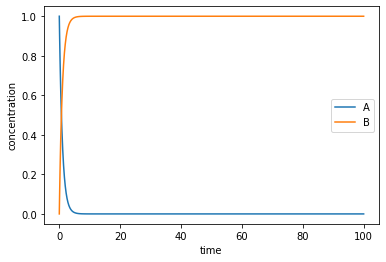

run time: 0.025s


In [3]:
# Asking to solve the model:
chem1.run()

End time can be set separately. Variable `chem1` still preserves all previous info, no need to specify reaction again.

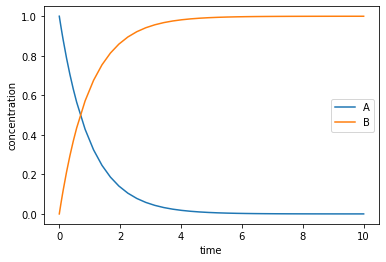

run time: 0.018s


In [4]:
#Setting end time to 10:
chem1.time_stop = 10
#Running the model with new end time:
chem1.run()

#### Solver algorithm:
For details, see <a href="https://en.wikipedia.org/wiki/Petersen_matrix"> Petersen matrix</a>.

This reaction $\ce{A ->[k=1] B}$ is described with system of two differential equations:

$$
\begin{aligned}
\frac{d [A]}{dt} &= -k[A]\\
\frac{d [B]}{dt} &= k[A]
\end{aligned}
$$

The program solves such systems in matrix form, given the general form of differential equation:
\begin{equation*}
\begin{pmatrix}
\frac{d}{dt}[A] \\
\frac{d}{dt}[B]
\end{pmatrix} = 
\begin{bmatrix}
-1 \\
+1
\end{bmatrix}
\begin{pmatrix}
k[A]\\
k[A]
\end{pmatrix}
\end{equation*}

Stoichiometrics coefficients can be accessed with `.stoichiometry` parameter, and reaction orders with `.orders`:

In [5]:
print(f'Stoichiometry: \n {chem1.stoichiometry}')
print(f'Orders: \n{chem1.orders}')

Stoichiometry: 
 [[-1  1]]
Orders: 
[[1 0]]


### 2. System of reactions:
Hypothetical system of reactions, rate constants are equal 1. Some reactions are reversible:
$$
A\rightarrow B \\
A+X \leftrightarrow C+D \\
B+Y \leftrightarrow C+E \\
E+D \leftrightarrow F
$$
Starting concentrations are: A=1, X=1, B=1, Y=1, the rest is 0. Simulation time = 30 seconds.

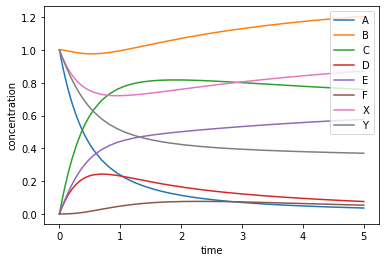

run time: 0.021s


In [6]:
# Creating new empty chemical simulation domain with name 'chem2'
chem2 = models.Chemistry()
#Each line adds new reaction to the system of reactions under 'chem2'
chem2.reaction('A=>B')
chem2.reaction('A+X<=>C+D')
chem2.reaction('B+Y<=>C+E')
chem2.reaction('E+D<=>F')
# Setting initial concentrations,
# Ommitted species starting concentrations are implied to be 0:
chem2.initial_concentrations(A=1, X=1, B=1, Y=1)
chem2.time_stop = 5
chem2.run()

When there are are too many lines on the plot, specific species can be selected with `.plot('species1','species2',...)` command:

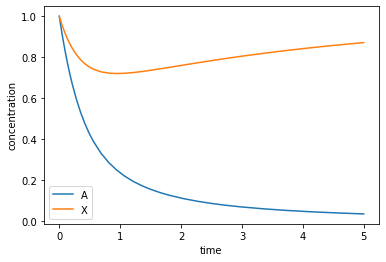

In [7]:
chem2.plot('A', 'X')

## 3. Defining rate constants:
#### Irreversible reactions:

By default, all rate constants are implied equal to 1. If you want to have rate different rate constant, then set it explicitly.
$$
\ce{A ->[k=0.1] B}\\
\ce{X ->[k=2] Y}
$$
rate constant is set with variable `k`

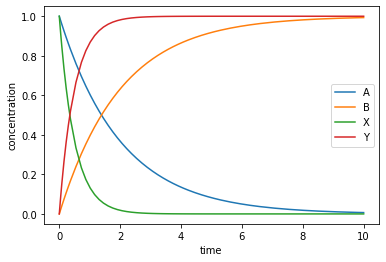

run time: 0.023s


In [8]:
chem3 = models.Chemistry()
chem3.reaction('A=>B', k=0.5) # slow reaction
chem3.reaction('X=>Y', k=2) # fast reaction
chem3.time_stop = 10
chem3.initial_concentrations(A=1, X=1)
chem3.run()

#### Reversible reaction:

By default, all rate constants are equal to 1.
$$
\ce{A <=>[k_1=3][k_2=1] B}
$$

Forward rate constant is set as `k1`, and reverse rate constant is set as `k2`

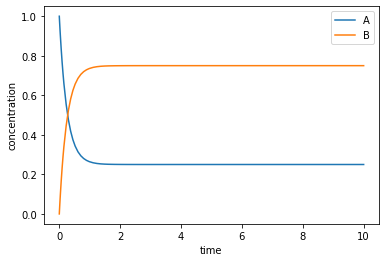

run time: 0.016s


In [9]:
chem4 = models.Chemistry()
chem4.reaction('A<=>B', k1=3, k2=1)
chem4.time_stop = 10
chem4.initial_concentrations(A=1)
chem4.run()

#### Additional parameters:
Numerical solutions can be accessed with `.solution['species']` parameter:

In [10]:
print(chem1.solution['A'])

[1.00000000e+00 9.99881091e-01 9.99762196e-01 9.98574460e-01
 9.97388104e-01 9.91939040e-01 9.86519080e-01 9.81128550e-01
 9.46804806e-01 9.13679705e-01 8.81713750e-01 7.88806500e-01
 7.05706545e-01 6.31365198e-01 5.64852445e-01 4.28087859e-01
 3.24360899e-01 2.45762548e-01 1.86237927e-01 1.41143842e-01
 1.05014793e-01 7.81215331e-02 5.81156467e-02 4.32381248e-02
 3.21712497e-02 2.39759665e-02 1.78671366e-02 1.33146995e-02
 9.92265259e-03 7.39497739e-03 5.42748068e-03 3.98484929e-03
 2.92614496e-03 2.14842155e-03 1.57713768e-03 1.15785416e-03
 7.84800521e-04 5.32431085e-04 3.61125555e-04 2.44676812e-04
 1.65744878e-04 1.12410125e-04 7.18843040e-05 4.60997375e-05]


time steps are available with `.solution['t']`:

In [11]:
print(chem1.solution['t'])

[0.00000000e+00 1.18920682e-04 2.37841364e-04 1.42704818e-03
 2.61625500e-03 8.09541534e-03 1.35745757e-02 1.90537360e-02
 5.46582222e-02 9.02627085e-02 1.25867195e-01 2.37206988e-01
 3.48546781e-01 4.59886574e-01 5.71226367e-01 8.48332908e-01
 1.12543945e+00 1.40254599e+00 1.67965253e+00 1.95675907e+00
 2.25215554e+00 2.54755202e+00 2.84294849e+00 3.13834496e+00
 3.43374143e+00 3.72746946e+00 4.02119749e+00 4.31492553e+00
 4.60865356e+00 4.90238159e+00 5.21163012e+00 5.52087865e+00
 5.83012718e+00 6.13937572e+00 6.44862425e+00 6.75787278e+00
 7.14790562e+00 7.53793847e+00 7.92797131e+00 8.31800416e+00
 8.70803700e+00 9.09806985e+00 9.55015991e+00 1.00000000e+01]


Bigger stoichiometry and rate order matrices:

In [12]:
print(f'Stoichiometry:\n {chem2.stoichiometry}')
print(f'Orders:\n {chem2.orders}')

Stoichiometry:
 [[-1.  1.  0.  0.  0.  0.  0.  0.]
 [-1.  0.  1.  1.  0.  0. -1.  0.]
 [ 1.  0. -1. -1.  0.  0.  1.  0.]
 [ 0. -1.  1.  0.  1.  0.  0. -1.]
 [ 0.  1. -1.  0. -1.  0.  0.  1.]
 [ 0.  0.  0. -1. -1.  1.  0.  0.]
 [ 0.  0.  0.  1.  1. -1.  0.  0.]]
Orders:
 [[1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]]
